# Integrantes:
    Brusco, Pablo
    pablo.brusco@gmail.com
    LU: 527/08    
    
    Montero, Agustin
    monteroagustinismael@gmail.com
    LU: 058/08

# Algoritmos de clasificación
Un análisis básico en el contexto de clasificación de vinos blancos y Text Mining.

## Objetivo:
El objetivo de este trabajo práctico es analizar características y particularidades de 3 algoritmos básicos de clasificación:
    1. Árboles de Decisión (DT, por Decision Trees)
    2. Vecinos más cercanos (NN, por Nearest Neighbors)
    3. Naive Bayes (NB)
En el caso de 1. y 2. se analizarán los efectos del sobreajuste (overfitting) y ruido sobre un conjunto de datos extraídos del [repositorio](http://archive.ics.uci.edu/ml/) de Machine Learning de IC Irvine, sobre [vinos blancos](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv).

Luego, para 3. se analizarán los efectos de aplicar NB en Text Mining utilizando un [conjunto de datos](http://ramon.bounceme.net/ml15/notas_ln.csv.gz) proporcionado por los docentes de la materia, basado en notas periodísticas de un diario nacional.

Finalmente, dado que el trabajo pretende ser un análisis acotado, incluímos una conclusión y posibles futuras líneas de experimentación, y consideraciones a tener en cuenta en un trabajo futuro más exhaustivo.

Para una mejor organización, el trabajo está particionado en 2 *notebooks*, uno correspondiente a DTs + NNs y el otro con la parte que utiliza NBs.

## Árboles de Decisión
Árboles de decisión es una técnica de aprendizaje donde la función de aprendizaje puede ser pensada como un árbol en donde los nodos poseen decisiones que permiten recorrer la estructura desde la raiz hasta las hojas de manera que un camino completo permitirá determinar la clase de una instancia a clasificar.   

Han sido aplicados con éxito durante la década del '70 en contextos que van desde el diagnóstico médico hasta el análisis de riesgo de crédito en solicitantes de préstamos por su facilidad de interpretación y su costo computacional bajo que permite hacer pruebas rápidas y obtener resultados intuitivos. 

En esta oportunidad, se utilizarán árboles de decisión para clasificar la calidad de vinos blancos. En particular, se analizan los siguientes puntos según especifica el [enunciado del trabajo](https://docs.google.com/document/d/1zYZ5vkFf9wEukVGJHIYMerWs2qOSn4R-jnilfO088QY/edit?usp=sharing):

1. Utilización de árboles de diferente tamaño
2. Sobreajuste (overfitting)
3. Robustez del método frente al ruido en los datos

    En todos los casos se graficará el desempeño sobre el conjunto de entrenamiento y sobre el conjunto de test, teniendo en cuenta como métrica la medida: accuracy (porcentaje de datos clasificados correctamente):
    
    $accuracy$ = $\frac{TP + TN}{TP+FP+FN+TN}$
   
donde TP se refiere a los Verdaderos Positivos (True Positives); TN refiere a los Verdaderos Negativos (True Negatives); FP refiere a los Falsos Negativos (False Negatives); y por último FN se refiere a los Falsos Negativos (False Negatives).



## Sobre el conjunto de datos

El [conjunto de datos](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names) cuenta con 4898 muestras de vinos blancos, y sobre cada una se conoce el valor de 11 atributos numéricos (floats):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Además, cada muestra está identificada con un puntaje entre 0 y 10 (un entero que representa la calidad del vino). Se sabe que la distribución de este último no es uniforme (hay más cantidad de vinos *normales* que de vinos malos, o vinos muy buenos).

Por esta razón, nos parece importante hacer un mínimo análisis sobre la distribución de los datos para luego poder evaluar si los resultados superan al azar o no lo hacen. Para esto, se graficará la distribución de las diferentes calidades de vinos:

In [3]:
# leemos el conjunto de datos
from os.path import expanduser
import numpy as np
import csv
home = expanduser("~")

X, y = [], []

with open("./winequality-white.csv", 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for i, row in enumerate(spamreader):
        if i != 0:
            X.append([float(x) for x in row[0:-1]])
            y.append(int(row[-1]))
            
X, y = np.array(X), np.array(y)

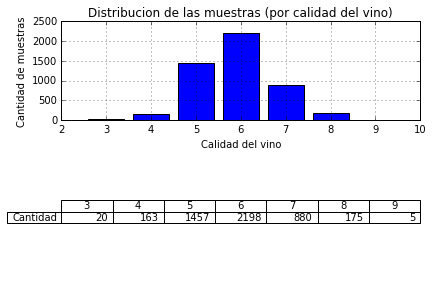

In [4]:
# grafico la distribución de calidades de vinos (clases del conjunto de datos)
%matplotlib inline

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

qualities = list(set(y))
quantities = [ list(y).count(l) for l in qualities ]

fig, axarr = plt.subplots(2, sharey=False, sharex=False)

# Construyo el grafico de barras
axarr[0].bar(qualities, quantities, align="center")
axarr[0].set_xlabel('Calidad del vino')
axarr[0].set_ylabel('Cantidad de muestras')
axarr[0].set_title('Distribucion de las muestras (por calidad del vino)')
axarr[0].grid(True)

# Construyo una tabla
rows = ['Cantidad']
columns = [str(q) for q in qualities]
axarr[1].table(cellText=[quantities], rowLabels=rows, colLabels=columns, loc='center')
axarr[1].axis('off')

fig.tight_layout()
plt.show()

A continuación se particionarán los datos en 2 conjuntos, utilizando el 80% con conjunto de entrenamiento y el 20% como conjunto de validación (test):

In [5]:
# separamos el dataset en train y test. Fijo la semilla (random_state) en 1 para poder reproducir el experimento.
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=1) 


Construimos el clasificador utilizando árboles de decisión, y lo ajustamos a los datos de entrenamiento utilizando los [parámetros default](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

In [6]:
from sklearn import tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(random_state=2).fit(X_train,y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print "Accuracy sobre el train: ", accuracy_score(y_train_pred,y_train)
print "Accuracy sobre el test: ", accuracy_score(y_test_pred,y_test)

Accuracy sobre el train:  1.0
Accuracy sobre el test:  0.60612244898


Observamos entonces que sobre el conjunto de entrenamiento el desempeño es ideal, (estamos clasificando correctamente a cada una de las muestras). Esto se explica en la forma en que estamos construyendo el árbol, en la cual la profundidad del mismo no está acotada, y por lo tanto cada una de las ramas se refina lo suficiente para que cada muestra se transforme en una hoja. Es importante que para esto asumimos que el conjunto de datos original es *consistente*, en el sentido de que 2 muestras no tienen distinta calidad si todos los atributos tienen el mismo valor.

A esta altura nos pareció muy representativo el siguiente gráfico:

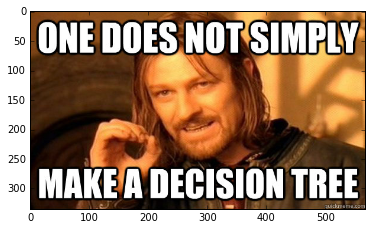

In [7]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('tree.jpg', 'r')
imshow(np.asarray(pil_im))

Es importante observar que en este caso, medir el desempeño utilizando el conjunto de entrenamiento es poco representativo: está sobreajustando los datos de entrenamiento. Si computamos la performance sobre el conjunto de test, tenemos ~60% de muestras clasificadas correctamente (muy distinto del supuesto 100% que reportaba el conjunto de entrenamiento).

A continuación se construyen árboles de diferente tamaño para observar cómo impacta en el desempeño tanto del conjunto de entremiento, como del conjunto de test, para analizar nuevamente el fenómeno de sobreajuste.

En primer lugar, vamos a variar la cantidad mínima de muestras necesarias para que un nodo del árbol se considere una hoja (por default, este parámetro es 1). Es de esperar que al variar este parámetro, el desempeño sobre el conjunto de entrenamiento ya no sea ideal, dado que existe la posiblidad de que muestras correspondientes a diferentes clases de vinos caigan en la misma *hoja*:

In [10]:
from sklearn import tree

nodes = []
score_train = []
score_test = []

# variamos desde 1 hasta la #muestras / 2 en el set de train, considerando evaluar cada 10
for i in range(2,len(X_train)/2,10):
    clf = tree.DecisionTreeClassifier(min_samples_leaf=i, random_state=2).fit(X_train,y_train)
    nodes.append(i)
    score_train.append( accuracy_score(clf.predict(X_train),y_train) )
    score_test.append( accuracy_score(clf.predict(X_test),y_test) )


Graficamos el desempeño sobre los conjuntos de datos:

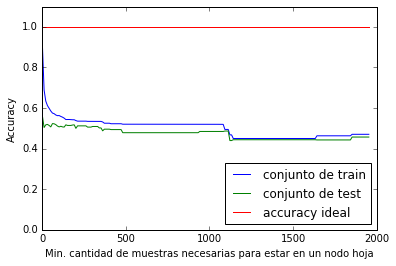

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(nodes, score_train, label="conjunto de train")
plt.plot(nodes, score_test, label="conjunto de test")
plt.plot(nodes, [1]*len(nodes), label="accuracy ideal")

plt.ylim((0,1.1))
plt.xlabel('Min. cantidad de muestras necesarias para estar en un nodo hoja')
plt.ylabel('Accuracy')
plt.legend(loc=4)
plt.show()

Como resultado, observamos en primer lugar que el sobreajuste se reduce sobre el conjunto de entrenamiento, siendo este cada vez más parecido al desempeño observado sobre el conjunto de test. Nuevamente, estamos considerando como hojas a nodos que concentran cada vez más cantidad de muestras. El hecho de que a mayor cantidad de muestras en las hojas, la accuracy sea ~50% puede estar relacionado con la distribución de las muestras, donde la calidad de vino con valor 6 concentra casi la mitad del conjunto de datos. De esta manera, creemos que las muestras que estamos clasificando bien corresponden a aquellas cuya calidad es 6. Para poner a prueba esta hipótesis, se hace el siguiente experimento: se reconstruye el clasificador basado en un árbol utilizando 2000 muestras (como mínimo) para que un nodo sea considerado hoja. Vamos a contar la cantidad de Verdaderos Positivos (muestras bien clasificadas), para cada clase. Nos gustaría observar que la clase 6 (vinos con dicha calidad), es la que concentra la mayor cantidad de instancias al clasificar:

In [12]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=2000, random_state=2).fit(X_train,y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

counter_train = [0 for clase in xrange(0,11)]
counter_test = [0 for clase in xrange(0,11)]

for i in xrange(len(y_train_pred)):
    if y_train_pred[i] == y_train[i]:
        counter_train[y_train_pred[i]] += 1

for i in xrange(len(y_test_pred)):
    if y_test_pred[i] == y_test[i]:
        counter_test[y_test_pred[i]] += 1

print "Aciertos en train: ", counter_train
print "Clase más votada: ", counter_train.index(max(counter_train))
print "Aciertos en test: ", counter_test
print "Clase más votada: ", counter_test.index(max(counter_test))


Aciertos en train:  [0, 0, 0, 0, 0, 0, 1763, 0, 0, 0, 0]
Clase más votada:  6
Aciertos en test:  [0, 0, 0, 0, 0, 0, 435, 0, 0, 0, 0]
Clase más votada:  6


Efectivamente, está clasificando todas las intancias con esta calidad. Sería interesante asignar pesos sobre las muestras, incluyendo información sobre la frecuencia que tienen estas (dada la característica del contexto en que lo estamos aplicando, donde son más frecuentes los vinos comunes de calidad media). Dejamos como trabajo a futuro este experimento.

A continuación nos interesa estudiar qué tan robustos son los árboles de decisión frente a la presencia de ruido. Para esto perturbamos el set de entrenamiento, agregando un porcentaje de ruido (entre 0 y 50%), en 2 experimentos distintos: 1. ruido sobre las clases, 2. ruido sobre los atributos; es decir, vamos a modificar la clase a la que corresponde un determinado porcentaje de muestras del set de datos original, o los valores de sus atributos según el experimento.

Analicemos primero la sensibilidad del método frente a ruido en las clases. Para esto, utilizaremos los [parámetros default](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de DecisionTreeClassifier. Se considera agregar un porcentaje de ruido en el intervalo [0, 50], siendo este un número en $\mathbb{Z}$.

In [13]:
import random

noises = xrange(0, 51)
score_train = []
score_test = []

for noise in noises:
    y_train_noise = np.copy(y_train)
    for i in xrange(0, len(y_train_noise)):
        if random.random() * 100 < noise:
            # modificamos la clase con otra distinta, asegurando que se tengan muestras en el set de datos
            otras = list(qualities)
            otras.remove(y_train_noise[i])

            y_train_noise[i] = random.choice(otras)
    clf = tree.DecisionTreeClassifier(random_state=2).fit(X_train,y_train_noise)

    score_train.append( accuracy_score(clf.predict(X_train), y_train_noise))
    score_test.append( accuracy_score(clf.predict(X_test), y_test))

        

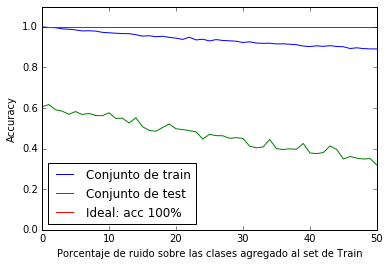

In [14]:
plt.plot(noises, score_train, label="Conjunto de train")
plt.plot(noises, score_test, label="Conjunto de test")
plt.plot(noises, [1.0]*len(noises), label="Ideal: acc 100%")
plt.ylim((0,1.1))
plt.legend(loc='best')
plt.xlabel('Porcentaje de ruido sobre las clases agregado al set de Train')
plt.ylabel('Accuracy')
plt.show()

Se puede observar cómo al aumentar la cantidad de ruido en las clases de las muestras, el desempeño tanto en el conjunto de train como en el de test, se reduce.

Por un lado, la reducción en el accuracy en el conjunto de entrenamiento se puede explicar como resultado de que al perturbar las clases, se agreguen inconsistencias sobre las muestras haciendo que el árbol (visto como hipótesis) no pueda separar correctamente a cada una de las muestras de train, y que como consecuencia, muestras correspondientes a clases distintas caigan en la misma hoja.

Por otro lado, es de esperar que una mala clasificación sobre las clases del conjunto de entrenamiento, se traduzca en un mal desempeño sobre la clasificación del conjunto de test, dado que se aprendió (entrenó el árbol), con un conjunto de datos mal clasificados (como efecto del ruido).

Veamos ahora qué tan sensible es el método frente a ruido sobre los atributos del conjunto de datos de entrenamiento. Para esto, el experimento es análogo al anterior, pero agregando ruido sobre todos los atributos de la muestra modificada, utilizando una distribución normal con $\mu = 0$, y $\sigma = 1$.

In [15]:
import random

noises = xrange(0, 51)
score_train = []
score_test = []

for noise in noises:
    X_train_noise = np.copy(X_train)
    for i in xrange(0, len(X_train_noise)):
        if random.random() * 100 < noise:
            X_train_noise[i] = X_train_noise[i] + np.random.normal(0,1,X_train_noise[i].size)
    clf = tree.DecisionTreeClassifier(random_state=2).fit(X_train_noise,y_train)

    score_train.append( accuracy_score(clf.predict(X_train_noise), y_train))
    score_test.append( accuracy_score(clf.predict(X_test), y_test))


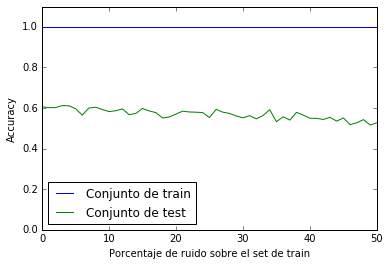

In [16]:
plt.plot(noises, score_train, label="Conjunto de train")
plt.plot(noises, score_test, label="Conjunto de test")
plt.ylim((0,1.1))
plt.legend(loc='best')
plt.xlabel('Porcentaje de ruido sobre el set de train')
plt.ylabel('Accuracy')
plt.show()

El resultado muestra que el desempeño sobre el conjunto de test mantiene una tendencia al incrementar la cantidad de ruido sobre los atributos. Si bien es posible que en muchos casos, el tipo de ruido que estamos agregando no sea suficiente como para generar impacto en la clasificación (por ejemplo, porque los valores de algún atributo son muy grandes, y el ruido resulta despreciable), en esta primera etapa el resultado sugiere que la técnica es robusta ante el ruido en atributos. Queda como experimento (a futuro) más exhaustivo, experimentar más con el tipo de ruido que se agrega.

## Vecinos más Cercanos

Esta técnica de clasifición consiste en buscar una cantidad fija (digamos 'k') de muestras más cercanas a la instancia que queremos clasificar, para luego predecir la clase de dicha instancia en base a estas, utilizando por ejemplo un criterio de votación (es decir, elegir la clase más frecuente dentro de las 'k' muestras más cercanas, usualmente llamado *moda*).

También es posible pesar las distancias en el criterio de clasificación (por ejemplo, usando la distancia euclídea).

A continuación se realizan experimentos con el objetivo de analizar:

1. Impacto de asignar pesos en la clasificación
2. Sobreajuste (Overfitting)
3. Impacto del método al aumentar la dimensionalidad de los datos

Empecemos por construir un clasificador que utiliza Vecinos más Cercanos, usando solo un vecino (n_neighbors=1), y el resto de los [parámetros por defecto](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), como método baseline para observar el comportamiento.

In [17]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf = clf.fit(X_train, y_train)

print "Accuracy sobre el conjunto de train:", accuracy_score(clf.predict(X_train), y_train)
print "Accuracy sobre el conjunto de test:", accuracy_score(clf.predict(X_test), y_test)

Accuracy sobre el conjunto de train: 1.0
Accuracy sobre el conjunto de test: 0.598979591837


Es de esperar que sobre el conjunto de train obtengamos un accuracy ideal (exactamente 1.0), pues estamos usando solo 1 (un) vecino y cada uno está incluido en el set de datos con el que construimos el clasificador.

Observar que el desempeño sobre el conjunto de test difiere mucho del ideal, y está cerca del ~60% de instancias bien clasificadas. Queremos analizar cómo impacta la cantidad de vecinos, y además, las consecuencias de incorporar peso según las distancias en el criterio de clasificación. Para esto vamos a variar la cantidad de vecinos entre 1 y 50, considerando una función de pesos uniforme, y otra que utilice el inverso de la distancia euclídea a la muestra (la idea es que una instancia muy lejana tenga menos peso que otra más cercana):

In [18]:
from sklearn import neighbors

ks = range(1,101)
score_train = []
score_test = []

score_train_weighted = []
score_test_weighted = []

for k in ks:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform').fit(X_train, y_train)
    score_train.append( accuracy_score(clf.predict(X_train), y_train) )
    score_test.append( accuracy_score(clf.predict(X_test), y_test) )
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance').fit(X_train, y_train)
    score_train_weighted.append( accuracy_score(clf.predict(X_train), y_train) )
    score_test_weighted.append( accuracy_score(clf.predict(X_test), y_test) )
    

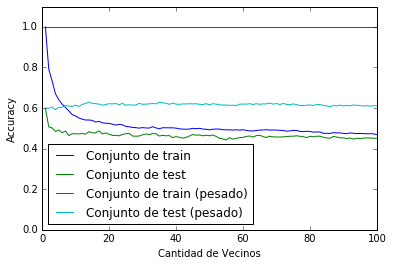

Cantidad de vecinos con max. acc. en modelo uniforme:  1
Cantidad de vecinos con max. acc. en modelo pesando distancias:  14


In [19]:
plt.plot(ks, score_train, label="Conjunto de train")
plt.plot(ks, score_test, label="Conjunto de test")
plt.plot(ks, score_train_weighted, label="Conjunto de train (pesado)")
plt.plot(ks, score_test_weighted, label="Conjunto de test (pesado)")
plt.ylim((0,1.1))
plt.legend(loc='best')
plt.xlabel('Cantidad de Vecinos')
plt.ylabel('Accuracy')
plt.show()

print "Cantidad de vecinos con max. acc. en modelo uniforme: ", 1+ score_test.index(max(score_test))
print "Cantidad de vecinos con max. acc. en modelo pesando distancias: ", 1+ score_test_weighted.index(max(score_test_weighted))

Como resultado del experimento vemos que pesar las distancias tiene un gran impacto frente al modelo que considera pesos uniformes. El desempeño del clasificador que pesa la distancia mantiene una tendencia con un accuracy ~60% mientras que el otro (con pesos uniformes), empeora su performance a medida que la cantidad de vecinos aumenta.

Si bien la intuición parecería indicar que aumentar la cantidad de vecinos *agrega* más información en la clasificación, podrían darse situaciones donde la mayoría (es decir, la *moda*) entre los *k* vecinos, esté mucho más lejos (en cuanto a distancia), que una minoría muy cercana. En el caso del conjunto de test sin pesos, el rendimiento baja rápidamente al incrementar la cantidad de vecinos, y se mantiene apenas por debajo del ~50%. El hecho de que el desempeño no empeore aún más, podría nuevamente explicarse con el set de datos utilizado, donde la distribución de clases no es uniforme, y aproximadamente la mitad de las instancias (vinos blancos) son de calidad 6.

Por otro lado, es interesante cómo la evaluación sobre el conjunto de datos de train también difiere respecto del train pesado. El peso de las distancias hace que la presencia de la instancia a clasificar en el set utilizando como *entrenamiento* sea la que determine la calidad del vino, produciendo un accuracy del 100%.

Finalmente, también podemos analizar el overfitting, donde por ejemplo en el conjunto de train pesado las instancias con la que fue construído el modelo (kNN) son clasificadas perfectamente, mientras que ante instancias nuevas (conjunto de test pesado), el desempeño es mucho menor. De la misma manera, el conjunto de train sin pesos, para k=1 también está sobreajustando los datos, clasificando también perfectamente las muestras de train (es decir, aquellas que ya eran conocidas), y funcionando con una performance mucho peor sobre datos nuevos (en este caso, el conjunto de test sin ruido). Esto último deja en claro también la importancia de no medir el rendimiento sobre el conjunto de entrenamiento. Como futuro experimento, sería correcto no limitarse a esta partición particular (en conj. de train y test), y aplicar [K-fold crossvalidation](http://scikit-learn.org/stable/modules/cross_validation.html) para evitar el overfitting. Aún más, sería interesante particionar inicialmente el conjunto de datos en un set de valicación (sobre el que nunca se trabajará hasta el final del estudio), y un set de desarrollo (que luego será particionado en train y test). Esto, ayuda a reducir aún más el overfitting.


El siguiente experimento analiza la sensibilidad del método frente a la alta dimensionalidad. Para esto, vamos a agregar nuevas variables (que toman valores uniformes entre 0 y 20) sobre cada una de las muestras. Vamos a considerar 3 valores para los vecinos: 1, 5 y 10, en un modelo que pesa las distancias. Se considera, además del desempeño sobre el conjunto de atributos original, el desempeño al agregar entre 1 y 150 nuevos atributos.

In [20]:
extra_atts = range(len(X_train[0])+1, len(X_train[0])+150)

X_train_ext = list([ list(row) for row in X_train])
X_test_ext = list([ list(row) for row in X_test ])

random.seed(2)

clf = neighbors.KNeighborsClassifier(n_neighbors=1,weights='distance').fit(X_train,y_train)
score_test_k1 = [accuracy_score(clf.predict(X_test),y_test)]
clf = neighbors.KNeighborsClassifier(n_neighbors=5,weights='distance').fit(X_train,y_train)
score_test_k5 = [accuracy_score(clf.predict(X_test),y_test)]
clf = neighbors.KNeighborsClassifier(n_neighbors=10,weights='distance').fit(X_train,y_train)
score_test_k10 = [accuracy_score(clf.predict(X_test),y_test)]

for att in extra_atts:
    # agrego variables extra
    X_train_ext = [ row+[random.randint(0,20)] for row in X_train_ext]
    X_test_ext = [ row+[random.randint(0,20)] for row in X_test_ext]
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=1,weights='distance').fit(X_train_ext,y_train)
    score_test_k1.append( accuracy_score(clf.predict(X_test_ext),y_test) )
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=5,weights='distance').fit(X_train_ext,y_train)
    score_test_k5.append( accuracy_score(clf.predict(X_test_ext),y_test) )
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=10,weights='distance').fit(X_train_ext,y_train)
    score_test_k10.append( accuracy_score(clf.predict(X_test_ext),y_test) )
    
extra_atts = [len(X_train[0])] + extra_atts

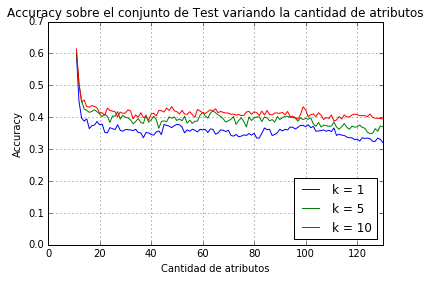

In [21]:
plt.plot(extra_atts, score_test_k1, label='k = 1')
plt.plot(extra_atts, score_test_k5, label='k = 5')
plt.plot(extra_atts, score_test_k10, label='k = 10')
plt.ylim((0,0.7))
plt.xlim((0,130))
plt.title('Accuracy sobre el conjunto de Test variando la cantidad de atributos')
plt.xlabel('Cantidad de atributos')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc=4)
plt.show()

Para cada uno de los valores de k (cantidad de vecinos de k-NN) se observa una tendencia: el desempeño baja a medida que aumenta la dimensionalidad. Este resultado coincide con un problema conocido de esta técnica: *curse of dimensionality*, donde al aumentar la dimensión de las muestras, sin aumentar la cantidad de éstas, es *más difícil* encontrar patrones, y por lo tanto la *cercanía* (es decir, la distancia) pierde importancia en la determinación de la clase.

Ahora, es interesante que en el experimento que planteamos agregamos variables que ninguna relación tienen con el conjunto de datos originales. La intuición podría indicar que agregar nuevas variables *agregaría información* al modelo, siempre y cuando estas variables sean interesantes, y tengan información del dominio. Se propone entonces un experimento donde las variables agregadas tengan relación con el problema. Esperamos ver que el desempeño mejora levemente al agregar nuevas variables (siempre y cuando éstas sean interesantes), pero nuevamente, si la cantidad de éstas aumenta *demasiado*, creemos que se va a ver muy perjudicada la performance.

El siguiente experimento considera agregar atributos de manera análoda al experimento anterior, con la diferencia de que ahora las variables son el producto de los valores de los atributos con los que se cuenta en el conjunto de train. Entonces, si una instancia del conjunto de train tiene los siguientes atributos:

$t_1, \ldots, t_{11}$

Vamos a agregar nuevas variables:

$t_1^2,\; t_1 \times t_2,\; \ldots,\; t_1\times t_{11},\; t_2^2,\; \ldots,\; t_2\times t_{11},\; \ldots, t_{11}^2$

es decir, el producto del valor del atributo $t_i$ y el atributo $t_j$, para $1\leq i \leq j\leq 11$.



In [22]:
X_train_ext = list([ list(row) for row in X_train])
X_test_ext = list([ list(row) for row in X_test ])

random.seed(2)

clf = neighbors.KNeighborsClassifier(n_neighbors=1,weights='distance').fit(X_train,y_train)
score_test_k1 = [accuracy_score(clf.predict(X_test),y_test)]
clf = neighbors.KNeighborsClassifier(n_neighbors=5,weights='distance').fit(X_train,y_train)
score_test_k5 = [accuracy_score(clf.predict(X_test),y_test)]
clf = neighbors.KNeighborsClassifier(n_neighbors=10,weights='distance').fit(X_train,y_train)
score_test_k10 = [accuracy_score(clf.predict(X_test),y_test)]

extra_atts = range(11, 11 + (11*12/2) + 1)

for i in xrange(11):
    for j in xrange(i,11):

        X_train_ext = [ row+[ row[i] * row[j] ] for row in X_train_ext]
        X_test_ext = [ row+[ row[i] * row[j] ] for row in X_test_ext]

        clf = neighbors.KNeighborsClassifier(n_neighbors=1,weights='distance').fit(X_train_ext,y_train)
        score_test_k1.append( accuracy_score(clf.predict(X_test_ext),y_test) )

        clf = neighbors.KNeighborsClassifier(n_neighbors=5,weights='distance').fit(X_train_ext,y_train)
        score_test_k5.append( accuracy_score(clf.predict(X_test_ext),y_test) )

        clf = neighbors.KNeighborsClassifier(n_neighbors=10,weights='distance').fit(X_train_ext,y_train)
        score_test_k10.append( accuracy_score(clf.predict(X_test_ext),y_test) )


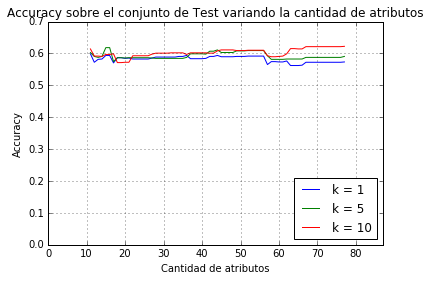

In [23]:
plt.plot(extra_atts, score_test_k1, label='k = 1')
plt.plot(extra_atts, score_test_k5, label='k = 5')
plt.plot(extra_atts, score_test_k10, label='k = 10')
plt.ylim((0,0.7))
plt.xlim((0,len(extra_atts)+ 20))
plt.title('Accuracy sobre el conjunto de Test variando la cantidad de atributos')
plt.xlabel('Cantidad de atributos')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc=4)
plt.show()

En este caso, los resultados se corresponden *a medias* con los que esperábamos. En primer lugar, el desempeño para los 3 valores de k (cantidad de vecinos más cercanos) a diferencia del experimento anterior, no empeora al aumentar la cantidad de atributos, y aún más, incluso a veces mejora la performance del método. En este sentido, esperábamos que si las variables incluían información relacionada con el contexto del problema, entonces debería ayudar a encontrar relaciones que en principio no vemos entre los atributos. Por otro lado, esperábamos ver que si aumentábamos mucho la dimensionalidad, cada una de las curvas tienda a ser cada vez peor (es decir, incialmente esperábamos que mejore, alcance un máximo y luego empeore nuevamente). Dada la forma en que generamos las variables, podría ser que no sean suficientes como para empeorar la performance, o  bien que incluso hasta la última variable sintetizada agregue nueva información al modelo. Quedaría para un experimento más exhaustivo, analizar qué sucede si consideramos más variables (por ejemplo, el producto de 3 valores en los atributos, es decir, $t_i \times t_j \times t_k$ para cada $1\leq i \leq j \leq k \leq 11$.

## Conclusiones

En esta primera parte consideramos el problema de clasificar la calidad de vinos blancos con el objetivo de analizar 2 algoritmos básicos para el problema de clasificación: Árboles de Decisión (DTs) y k-Vecinos más Cercanos (kNN). En el primer caso, analizamos el impacto de considerar árboles de diferente tamaño, el fenómeno de sobreajuste, y la sensibilidad de método frente a ruido en las clases y en los atributos de las muestras utilizadas. En el segundo caso, estudiamos la versión pesada de k-NN (la versión que utiliza pesos uniformes y la que pesa las distancias de las muestras), analizamos también el sobreajuste a los datos, y estudiamos el impacto del incremento de la dimensionalidad a través del agregado de atributos a las muestras.

En todos los casos, el análsis fue realizado de manera básica, considerando una partición del conjunto de datos en un set de train y otro de test. Además de la discusión de resultados que se agregó luego de cada experimento, queremos mencionar que durante el trabajo notamos la importancia que tiene, sobre los algoritmos, el dataset con el que se aplican los métodos. En nuestro caso, un dataset donde las clases no estaban distribuídas uniformemente, y donde incluso había clases que no existían (por ejemplo, nunca vamos a clasificar un vino con calidad 10, puesto que no había muestras de vino con esta calidad). Creemos desde ya que el trabajo es un análisis simple, y que muchos de los experimentos presentados podrían refinarse o analizar más exhaustivamente a través de las líneas ya mencionadas en cada una de las discusiones al final de los experimentos.

Finalmente, creemos que es muy importante intentar llevar los conceptos vistos durante las clases a *laboratorio*, es decir, aplicar aunque sea con un alcance acotado, las técnicas dentro de un contexto *real*, donde emergen muchos conceptos mencionados desde el punto de vista teórico, pero donde además se hacen presente detalles que desde la teoría pasan desapercibidos (ya sea desde lo implementativo, o a través de resultados poco intuitivos).